# 4) Evaluation

In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import pandas as pd
from pathlib import Path
import os
import seaborn as sns

In [2]:
ANNOTATION_ROOT_0500 = Path('Mazurkas_median_x0.500/annotations_beat/')
ANNOTATION_ROOT_0630 = Path('Mazurkas_median_x0.630/annotations_beat/')
ANNOTATION_ROOT_0794 = Path('Mazurkas_median_x0.794/annotations_beat/')
ANNOTATION_ROOT_1000 = Path('Mazurkas_median_x1.000/annotations_beat/')
ANNOTATION_ROOT_1260 = Path('Mazurkas_median_x1.260/annotations_beat/')
ANNOTATION_ROOT_1588 = Path('Mazurkas_median_x1.588/annotations_beat/')
ANNOTATION_ROOT_2000 = Path('Mazurkas_median_x2.000/annotations_beat/')

FEAT_ROOT_0500 = Path('Mazurkas_median_x0.500/features/clean/')
FEAT_ROOT_0630 = Path('Mazurkas_median_x0.630/features/clean/')
FEAT_ROOT_0794 = Path('Mazurkas_median_x0.794/features/clean/')
FEAT_ROOT_1000 = Path('Mazurkas_median_x1.000/features/clean/')
FEAT_ROOT_1260 = Path('Mazurkas_median_x1.260/features/clean/')
FEAT_ROOT_1588 = Path('Mazurkas_median_x1.588/features/clean/')
FEAT_ROOT_2000 = Path('Mazurkas_median_x2.000/features/clean/')


In [3]:
ANNOTATION_ROOT_0500_sub = Path('Mazurkas_median_x0.500_subseq20/annotations_beat/')
ANNOTATION_ROOT_0630_sub = Path('Mazurkas_median_x0.630_subseq20/annotations_beat/')
ANNOTATION_ROOT_0794_sub = Path('Mazurkas_median_x0.794_subseq20/annotations_beat/')
ANNOTATION_ROOT_1000_sub = Path('Mazurkas_median_x1.000_subseq20/annotations_beat/')
ANNOTATION_ROOT_1260_sub = Path('Mazurkas_median_x1.260_subseq20/annotations_beat/')
ANNOTATION_ROOT_1588_sub = Path('Mazurkas_median_x1.588_subseq20/annotations_beat/')
ANNOTATION_ROOT_2000_sub = Path('Mazurkas_median_x2.000_subseq20/annotations_beat/')

FEAT_ROOT_0500_sub = Path('Mazurkas_median_x0.500_subseq20/features/clean/')
FEAT_ROOT_0630_sub = Path('Mazurkas_median_x0.630_subseq20/features/clean/')
FEAT_ROOT_0794_sub = Path('Mazurkas_median_x0.794_subseq20/features/clean/')
FEAT_ROOT_1000_sub = Path('Mazurkas_median_x1.000_subseq20/features/clean/')
FEAT_ROOT_1260_sub = Path('Mazurkas_median_x1.260_subseq20/features/clean/')
FEAT_ROOT_1588_sub = Path('Mazurkas_median_x1.588_subseq20/features/clean/')
FEAT_ROOT_2000_sub = Path('Mazurkas_median_x2.000_subseq20/features/clean/')


### Helper functions
getTimestamps and loadAlignment are used in both 03_Evaluate and 04_Analysis. Might be a good idea to put them in tsm_tools?

In [15]:
def getTimestamps(annotfile):
    df = pd.read_csv(annotfile, header=None, sep='\s+', skiprows=3)
    return np.array(df[0])

In [58]:
def get_timestamps(annotfile, subseq=False, offset=None, length=None):
    df = pd.read_csv(annotfile, header=None, sep='\s+', skiprows=3)
    timestamps = np.array(df[0])
    if subseq:
        return timestamps, int(df[2][0].split("-")[-1]), len(timestamps)
    if offset:
        return timestamps[offset:offset+length], None, None
    return timestamps, None, None

In [17]:
def loadAlignment(hypfile):
    with open(hypfile, 'rb') as f:
        d = pickle.load(f)
    return d

### Graph path and cos matrix

In [18]:
def graph_paths(featfile1, featfile2, annotfile1, annotfile2, aligned_pkl):
    # construct matrix
    F1 = np.load(featfile1) # 12 x N
    F2 = np.load(featfile2) # 12 x M
    C = 1 - F1[:,0::1].T @ F2[:,0::1] # cos distance metric

    # get ground truth path
    gt1 = getTimestamps(annotfile1)
    gt2 = getTimestamps(annotfile2)
    hop_sec = 512 * 1 / 22050
    gt1 = gt1/hop_sec # convert from seconds to N and M
    gt2 = gt2/hop_sec

    # get aligned path
    hypfile = loadAlignment(aligned_pkl)

    # plot aligned path and ground truth path
    fig, (ax1, ax2) = plt.subplots(1, 2)
    plt.figure(figsize=(10,10))
    ax1.plot(hypfile[1], hypfile[0], color='black') # algorithm path
    ax1.set_title('Aligned Path')
    ax2.plot(gt2, gt1, color='red') # ground truth
    ax2.set_title('Ground Truth')

    # plot both on cos matrix
    plt.title('Aligned vs. ground truth on cos matrix')
    plt.plot(hypfile[1], hypfile[0], color='black')
    plt.plot(gt2, gt1, color='red')
    plt.imshow(C, origin = 'lower')
    
    plt.show()

#### DTW2

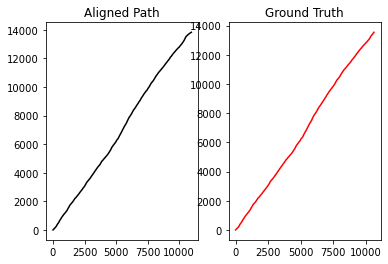

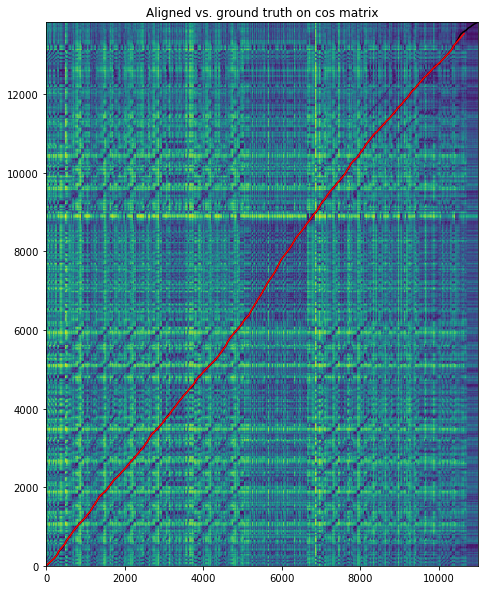

In [19]:
# SAMPLE 1
featfile1 = FEAT_ROOT_1260/'Chopin_Op017No4/Chopin_Op017No4_Ashkenazy-1981_pid9058-13.npy'
featfile2 = FEAT_ROOT_1000/'Chopin_Op017No4/Chopin_Op017No4_Falvay-1989_pid9068-08.npy'
annotfile1 = ANNOTATION_ROOT_1260/'Chopin_Op017No4/Chopin_Op017No4_Ashkenazy-1981_pid9058-13.beat'
annotfile2 = ANNOTATION_ROOT_1000/'Chopin_Op017No4/Chopin_Op017No4_Falvay-1989_pid9068-08.beat'
aligned_pkl = 'experiments_test/train_toy.x1260.x1000.DTW2/Chopin_Op017No4_Ashkenazy-1981_pid9058-13__Chopin_Op017No4_Falvay-1989_pid9068-08.pkl'
graph_paths(featfile1, featfile2, annotfile1, annotfile2, aligned_pkl)

In [ ]:
# SAMPLE 2
featfile1 = FEAT_ROOT_1588/'Chopin_Op017No4/Chopin_Op017No4_Ashkenazy-1981_pid9058-13.npy'
featfile2 = FEAT_ROOT_0794/'Chopin_Op017No4/Chopin_Op017No4_Falvay-1989_pid9068-08.npy'
annotfile1 = ANNOTATION_ROOT_1588/'Chopin_Op017No4/Chopin_Op017No4_Ashkenazy-1981_pid9058-13.beat'
annotfile2 = ANNOTATION_ROOT_0794/'Chopin_Op017No4/Chopin_Op017No4_Falvay-1989_pid9068-08.beat'
aligned_pkl = 'experiments_test/train_toy.x1588.x0794.DTW2/Chopin_Op017No4_Ashkenazy-1981_pid9058-13__Chopin_Op017No4_Falvay-1989_pid9068-08.pkl'
graph_paths(featfile1, featfile2, annotfile1, annotfile2, aligned_pkl)

#### DTW1_add4

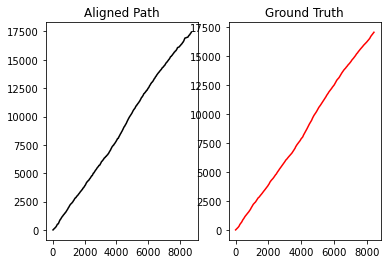

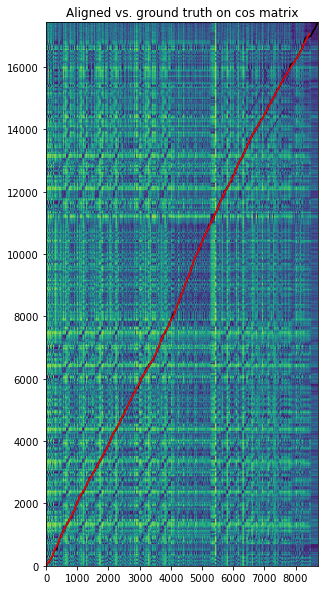

In [ ]:
# SAMPLE 1
featfile1 = FEAT_ROOT_1588/'Chopin_Op017No4/Chopin_Op017No4_Ashkenazy-1981_pid9058-13.npy'
featfile2 = FEAT_ROOT_0794/'Chopin_Op017No4/Chopin_Op017No4_Falvay-1989_pid9068-08.npy'
annotfile1 = ANNOTATION_ROOT_1588/'Chopin_Op017No4/Chopin_Op017No4_Ashkenazy-1981_pid9058-13.beat'
annotfile2 = ANNOTATION_ROOT_0794/'Chopin_Op017No4/Chopin_Op017No4_Falvay-1989_pid9068-08.beat'
aligned_pkl = 'experiments_test/train_toy.x1588.x0794.DTW1_add4/Chopin_Op017No4_Ashkenazy-1981_pid9058-13__Chopin_Op017No4_Falvay-1989_pid9068-08.pkl'
graph_paths(featfile1, featfile2, annotfile1, annotfile2, aligned_pkl)

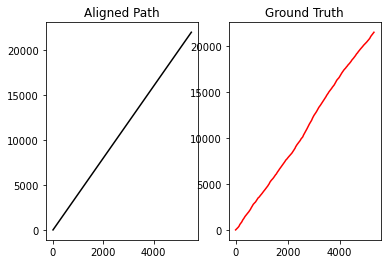

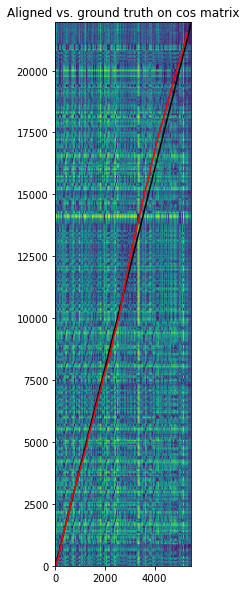

In [ ]:
# SAMPLE 2
featfile1 = FEAT_ROOT_2000/'Chopin_Op017No4/Chopin_Op017No4_Ashkenazy-1981_pid9058-13.npy'
featfile2 = FEAT_ROOT_0500/'Chopin_Op017No4/Chopin_Op017No4_Falvay-1989_pid9068-08.npy'
annotfile1 = ANNOTATION_ROOT_2000/'Chopin_Op017No4/Chopin_Op017No4_Ashkenazy-1981_pid9058-13.beat'
annotfile2 = ANNOTATION_ROOT_0500/'Chopin_Op017No4/Chopin_Op017No4_Falvay-1989_pid9068-08.beat'
aligned_pkl = 'experiments_test/train_toy.x2000.x0500.DTW1_add4/Chopin_Op017No4_Ashkenazy-1981_pid9058-13__Chopin_Op017No4_Falvay-1989_pid9068-08.pkl'
graph_paths(featfile1, featfile2, annotfile1, annotfile2, aligned_pkl)

#### DTW_downsampledQuantized, DTW_downsampleInterpolate, DTW_upsampleQuantized, DTW_upsampleInterpolate

#### DTW_adaptiveWeight2

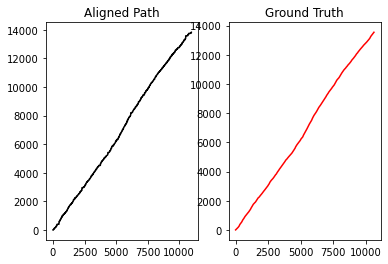

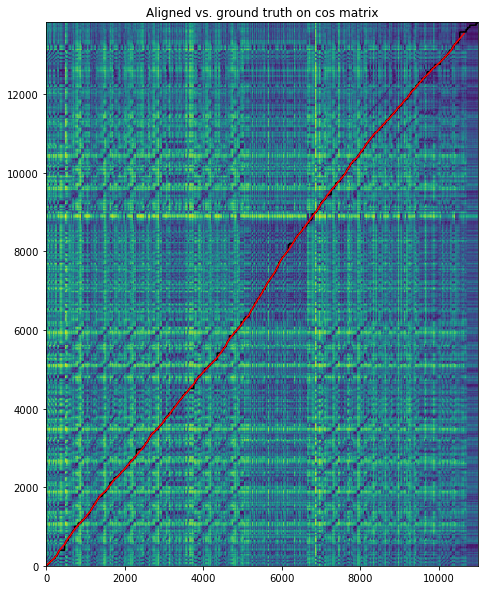

In [ ]:
# SAMPLE 1
featfile1 = FEAT_ROOT_1260/'Chopin_Op017No4/Chopin_Op017No4_Ashkenazy-1981_pid9058-13.npy'
featfile2 = FEAT_ROOT_1000/'Chopin_Op017No4/Chopin_Op017No4_Falvay-1989_pid9068-08.npy'
annotfile1 = ANNOTATION_ROOT_1260/'Chopin_Op017No4/Chopin_Op017No4_Ashkenazy-1981_pid9058-13.beat'
annotfile2 = ANNOTATION_ROOT_1000/'Chopin_Op017No4/Chopin_Op017No4_Falvay-1989_pid9068-08.beat'
aligned_pkl = 'experiments_test/train_toy.x1260.x1000.DTW_adaptiveWeight2/Chopin_Op017No4_Ashkenazy-1981_pid9058-13__Chopin_Op017No4_Falvay-1989_pid9068-08.pkl'
graph_paths(featfile1, featfile2, annotfile1, annotfile2, aligned_pkl)

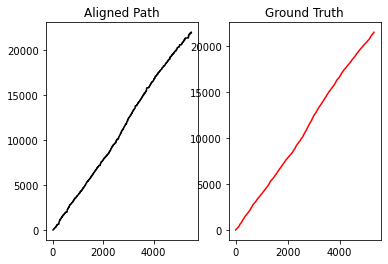

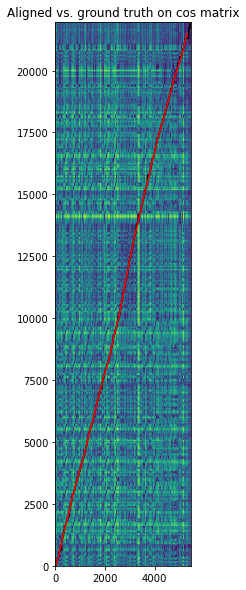

In [ ]:
# SAMPLE 2
featfile1 = FEAT_ROOT_2000/'Chopin_Op017No4/Chopin_Op017No4_Ashkenazy-1981_pid9058-13.npy'
featfile2 = FEAT_ROOT_0500/'Chopin_Op017No4/Chopin_Op017No4_Falvay-1989_pid9068-08.npy'
annotfile1 = ANNOTATION_ROOT_2000/'Chopin_Op017No4/Chopin_Op017No4_Ashkenazy-1981_pid9058-13.beat'
annotfile2 = ANNOTATION_ROOT_0500/'Chopin_Op017No4/Chopin_Op017No4_Falvay-1989_pid9068-08.beat'
aligned_pkl = 'experiments_test/train_toy.x2000.x0500.DTW_adaptiveWeight2/Chopin_Op017No4_Ashkenazy-1981_pid9058-13__Chopin_Op017No4_Falvay-1989_pid9068-08.pkl'
graph_paths(featfile1, featfile2, annotfile1, annotfile2, aligned_pkl)

#### DTW_selectiveTransitions5

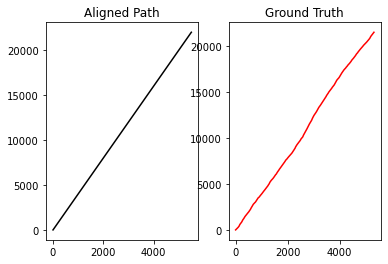

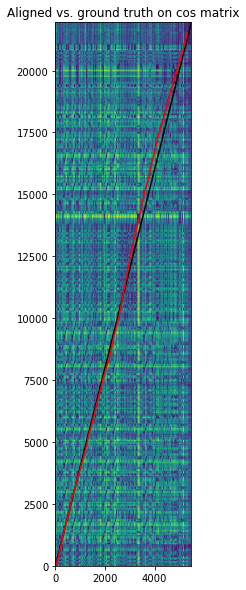

In [35]:
# SAMPLE 1
featfile1 = FEAT_ROOT_2000/'Chopin_Op017No4/Chopin_Op017No4_Ashkenazy-1981_pid9058-13.npy'
featfile2 = FEAT_ROOT_0500/'Chopin_Op017No4/Chopin_Op017No4_Falvay-1989_pid9068-08.npy'
annotfile1 = ANNOTATION_ROOT_2000/'Chopin_Op017No4/Chopin_Op017No4_Ashkenazy-1981_pid9058-13.beat'
annotfile2 = ANNOTATION_ROOT_0500/'Chopin_Op017No4/Chopin_Op017No4_Falvay-1989_pid9068-08.beat'
aligned_pkl = 'experiments_test/train_toy.x2000.x0500.DTW_selectiveTransitions4/Chopin_Op017No4_Ashkenazy-1981_pid9058-13__Chopin_Op017No4_Falvay-1989_pid9068-08.pkl'
graph_paths(featfile1, featfile2, annotfile1, annotfile2, aligned_pkl)

# Subsequence Graphs

In [65]:
def get_timestamps(annotfile, subseq=False, offset=None, length=None):
    df = pd.read_csv(annotfile, header=None, sep='\s+', skiprows=3)
    timestamps = np.array(df[0])
    if subseq:
        return timestamps, int(df[2][0].split("-")[-1]), len(timestamps)
    if offset:
        return timestamps[offset:offset+length], None, None
    return timestamps, None, None

In [83]:
def graph_paths_sub(featfile1, featfile2, annotfile1, annotfile2, aligned_pkl):
    # construct matrix
    F1 = np.load(featfile1) # 12 x N
    F2 = np.load(featfile2) # 12 x M
    C = 1 - F1[:,0::1].T @ F2[:,0::1] # cos distance metric

    # get ground truth path
    gt1, offset, length = get_timestamps(annotfile1, True, None, None)
    gt2, _, _ = get_timestamps(annotfile2, False, offset, length)
    hop_sec = 512 * 1 / 22050
    gt1 = gt1/hop_sec # convert from seconds to N and M
    gt2 = gt2/hop_sec

    # get aligned path
    hypfile = loadAlignment(aligned_pkl)

    # plot aligned path and ground truth path
    fig, (ax1, ax2) = plt.subplots(1, 2)
    plt.figure(figsize=(10,10))
    ax1.plot(hypfile[1], hypfile[0], color='black') # algorithm path
    ax1.set_title('Aligned Path')
    ax2.plot(gt2, gt1, color='red') # ground truth
    ax2.set_title('Ground Truth')

    # plot both on cos matrix
    plt.title('Aligned vs. ground truth on cos matrix')
    plt.plot(hypfile[1], hypfile[0], color='black')
    plt.plot(gt2, gt1, color='red')
    plt.imshow(C, origin = 'lower')
    
    plt.show()

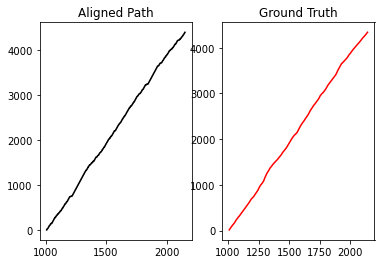

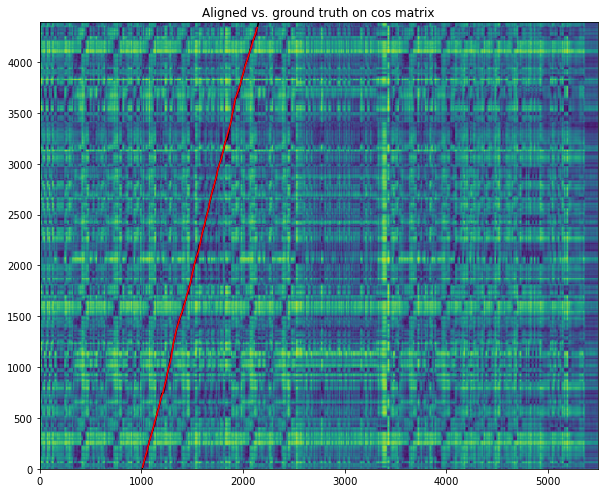

In [84]:
# SAMPLE 1
featfile1 = FEAT_ROOT_2000_sub/'Chopin_Op017No4/Chopin_Op017No4_Ashkenazy-1981_pid9058-13.npy'
featfile2 = FEAT_ROOT_0500/'Chopin_Op017No4/Chopin_Op017No4_Falvay-1989_pid9068-08.npy'
annotfile1 = ANNOTATION_ROOT_2000_sub/'Chopin_Op017No4/Chopin_Op017No4_Ashkenazy-1981_pid9058-13.beat'
annotfile2 = ANNOTATION_ROOT_0500/'Chopin_Op017No4/Chopin_Op017No4_Falvay-1989_pid9068-08.beat'
aligned_pkl = 'experiments_test/train_toy.x2000.x0500.SubDTW_selectiveTransitions5/Chopin_Op017No4_Ashkenazy-1981_pid9058-13__Chopin_Op017No4_Falvay-1989_pid9068-08.pkl'
graph_paths_sub(featfile1, featfile2, annotfile1, annotfile2, aligned_pkl)

# Steps Analysis

In [4]:
def get_global_time_warp(num1, num2):
    ''' calculate global time warp from two numbers'''
    return round(num1/num2, 3)

In [5]:
def eval_dir_steps(directory): # directory is ex. 'experiments_test_steps/train_toy.x1588.x0630.DTW1_downsampleInterpolate'
    # get global time warp
    filelist, num1, num2, algorithm = directory.split('/')[1].split('.')
    num1, num2 = int(num1[1:]), int(num2[1:])
    time_warp = get_global_time_warp(num1, num2)

    # make df
    df = pd.DataFrame(columns=['file','time_warp','steps','align_type',0,1,2,3,4,5,6])
    sums = pd.DataFrame(columns=['time_warp','steps','align_type',0,1,2,3,4,5,6])
    ratio = pd.DataFrame(columns=['time_warp','steps','align_type',0,1,2,3,4,5,6])

    # iterate over the steps.pkl files
    for filename in os.listdir(directory):
        f = os.path.join(directory,filename)
        if "steps" in filename:
            d = open(f, 'rb')
            data_dict = pickle.load(d)
            data_dict['file'] = directory
            data_dict['time_warp'] = time_warp
            data_dict['align_type'] = algorithm
            df = df.append(data_dict, ignore_index=True)

    # create sums df
    sums['steps'] = [data_dict['steps'].tolist()]
    sums['align_type'] = algorithm
    sums['time_warp'] = time_warp
    for i in range(7):
        sums[i] = df[i].sum()
    
    # create ratios df
    ratio['steps'] = [data_dict['steps'].tolist()]
    ratio['align_type'] = algorithm
    ratio['time_warp'] = time_warp
    total_steps = sums[[0,1,2,3,4,5,6]].copy().sum(axis = 1)
    for i in range(7):
        ratio[i] = sums[i]/total_steps

    

    return df, sums, ratio

In [6]:
def eval_all_steps(hypdir): # hypdir is ex. 'experiments_test_steps'
    df = pd.DataFrame(columns=['file','time_warp','steps','align_type',0,1,2,3,4,5,6])
    sum_df = pd.DataFrame(columns=['time_warp','steps','align_type',0,1,2,3,4,5,6])
    ratio = pd.DataFrame(columns=['time_warp','steps','align_type',0,1,2,3,4,5,6])
    for dir in os.listdir(hypdir):
        directory = os.path.join(hypdir, dir)
        append_df, append_sum_df, append_ratio = eval_dir_steps(directory)
        df, sum_df, ratio = pd.concat([df, append_df], ignore_index=True), pd.concat([sum_df, append_sum_df], ignore_index=True), pd.concat([ratio, append_ratio], ignore_index=True)
        print("Finished appending dataframe for {}".format(dir))
    return df, sum_df, ratio
    

In [ ]:
total_df, total_sum_df, ratio_df = eval_all_steps('experiments_test_steps')

In [152]:
total_df.to_csv("total_df.csv")
total_sum_df.to_csv("total_sum_df.csv")
ratio_df.to_csv("total_ratio.csv")

## Graphs

In [8]:
def generate_steps_df(align_type, ratio_df, steps):
    '''Used to make DataFrame used with the grouped barplots'''
    df = ratio_df[ratio_df['align_type']==align_type]
    new = pd.DataFrame(columns=['time_warp','steps','align_type','step_taken','ratio'])
    for idx, row in df.iterrows():
        for i in range(6):
            new_row = {}
            new_row['time_warp'] = row['time_warp']
            new_row['steps'] = row['steps']
            new_row['align_type'] = row['align_type']
            new_row['step_taken'] = i
            new_row['ratio'] = row[str(i)]
            new = new.append(new_row, ignore_index=True)

    # pad steps
    pad_steps = 6 - len(steps)
    for i in range(pad_steps+1):
        steps.append(None)
    
    new.rename(columns={str(i):steps[i] for i in range(7)})
    return new
        

In [9]:
graph_df = generate_steps_df('DTW1', ratio_df, [[1, 1], [1, 2], [2, 1]])

NameError: name 'ratio_df' is not defined

In [42]:
graph_df

,time_warp,steps,align_type,step_taken,ratio
0,2.521,"[[1, 1], [1, 2], [2, 1]]",DTW1,0,NaN
1,2.521,"[[1, 1], [1, 2], [2, 1]]",DTW1,1,NaN
2,2.521,"[[1, 1], [1, 2], [2, 1]]",DTW1,2,NaN
3,2.521,"[[1, 1], [1, 2], [2, 1]]",DTW1,3,NaN
4,2.521,"[[1, 1], [1, 2], [2, 1]]",DTW1,4,NaN
5,2.521,"[[1, 1], [1, 2], [2, 1]]",DTW1,5,NaN
6,4.000,"[[1, 1], [1, 2], [2, 1]]",DTW1,0,NaN
7,4.000,"[[1, 1], [1, 2], [2, 1]]",DTW1,1,NaN
8,4.000,"[[1, 1], [1, 2], [2, 1]]",DTW1,2,NaN
9,4.000,"[[1, 1], [1, 2], [2, 1]]",DTW1,3,NaN


In [ ]:
def graph_steps(align_type, graph_steps_df, steps):
    fig, ax = plt.subplots(figsize=(20, 12))
    sns.barplot(data=new, x="time_warp", y="ratio", hue="step_taken", palette="Paired", ax=ax)
    




In [17]:
ratio_df = pd.read_csv("total_ratio.csv")
ratio_df = ratio_df[['time_warp','align_type','steps','0','1','2','3','4','5','6']]

In [80]:
def graph_steps(ratio_df, align_type, DTW_steps, DTW_weights):
    DTW_df = ratio_df[ratio_df['align_type']==align_type]
    DTW_final = pd.DataFrame(columns=['time_warp','steps','align_type','step_taken','ratio'])

    for idx, row in DTW_df.iterrows():
        for i in range(6):
            new_row = {}
            new_row['time_warp'] = row['time_warp']
            new_row['steps'] = row['steps']
            new_row['align_type'] = row['align_type']
            new_row['step_taken'] = str(DTW_steps[i])+', Weight {}'.format(DTW_weights[i])
            new_row['ratio'] = row[str(i)]

            DTW_final = DTW_final.append(new_row, ignore_index=True)
    fig, ax = plt.subplots(figsize=(20, 12))

    sns.barplot(data=DTW_final, x="time_warp", y="ratio", hue="step_taken", palette="Paired")
    plt.title("Steps for {}".format(align_type), size=20)
    plt.xlabel("Global Time Warp", size=16)
    plt.ylabel("Ratio", size=16)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=14)
    plt.grid()
    plt.show()  
        

### DTW1-5

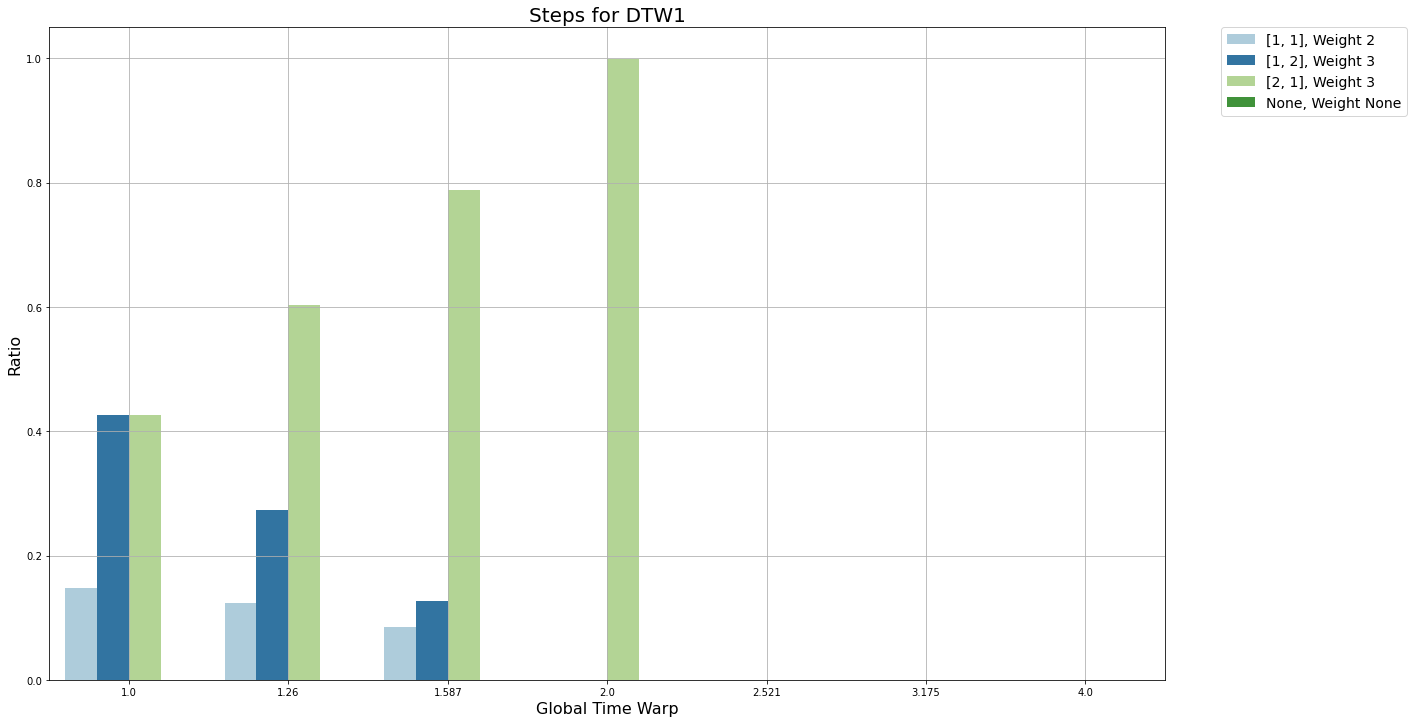

In [159]:
DTW1_steps = [[1, 1], [1, 2], [2, 1], None, None, None]
DTW1_weights = [2,3,3, None, None, None]
graph_steps(ratio_df, 'DTW1', DTW1_steps, DTW1_weights)

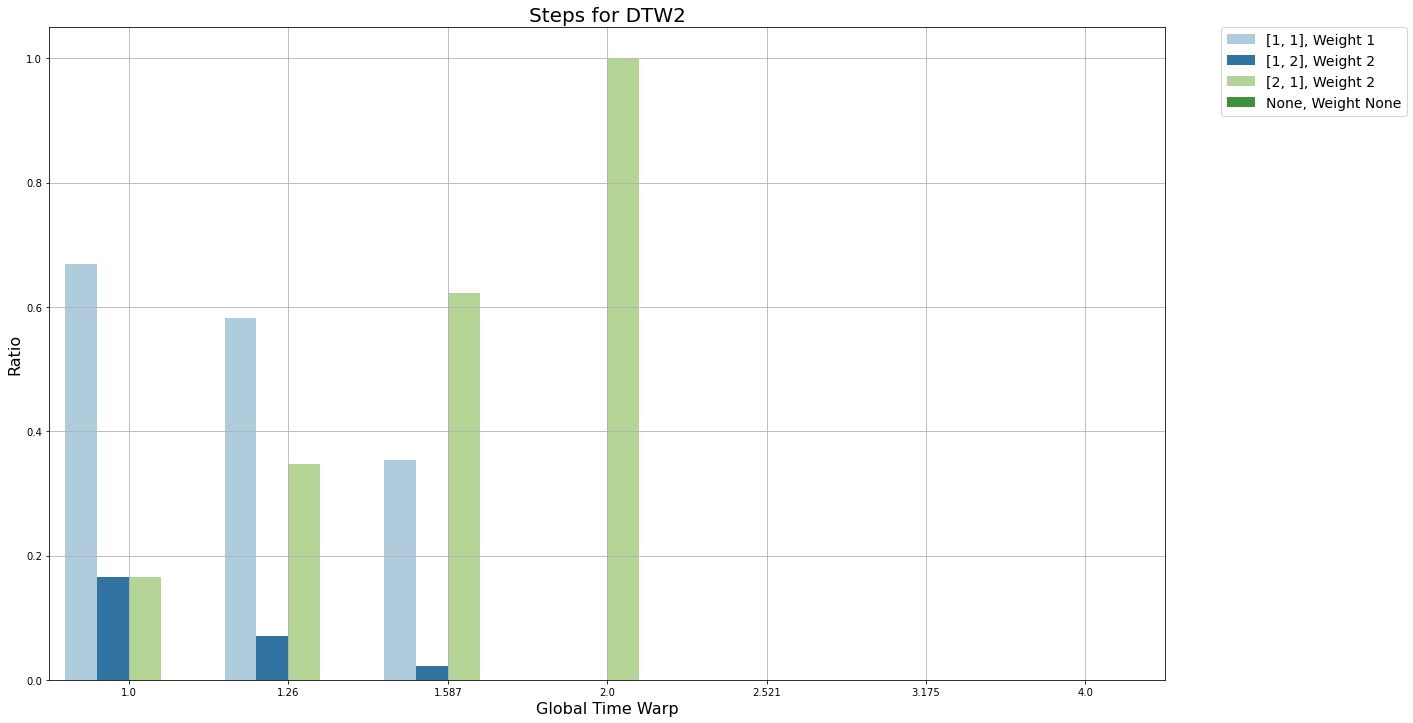

In [82]:
DTW2_steps = [[1, 1], [1, 2], [2, 1], None, None, None]
DTW2_weights = [1,2,2, None, None, None]
graph_steps(ratio_df, 'DTW2', DTW2_steps, DTW2_weights)

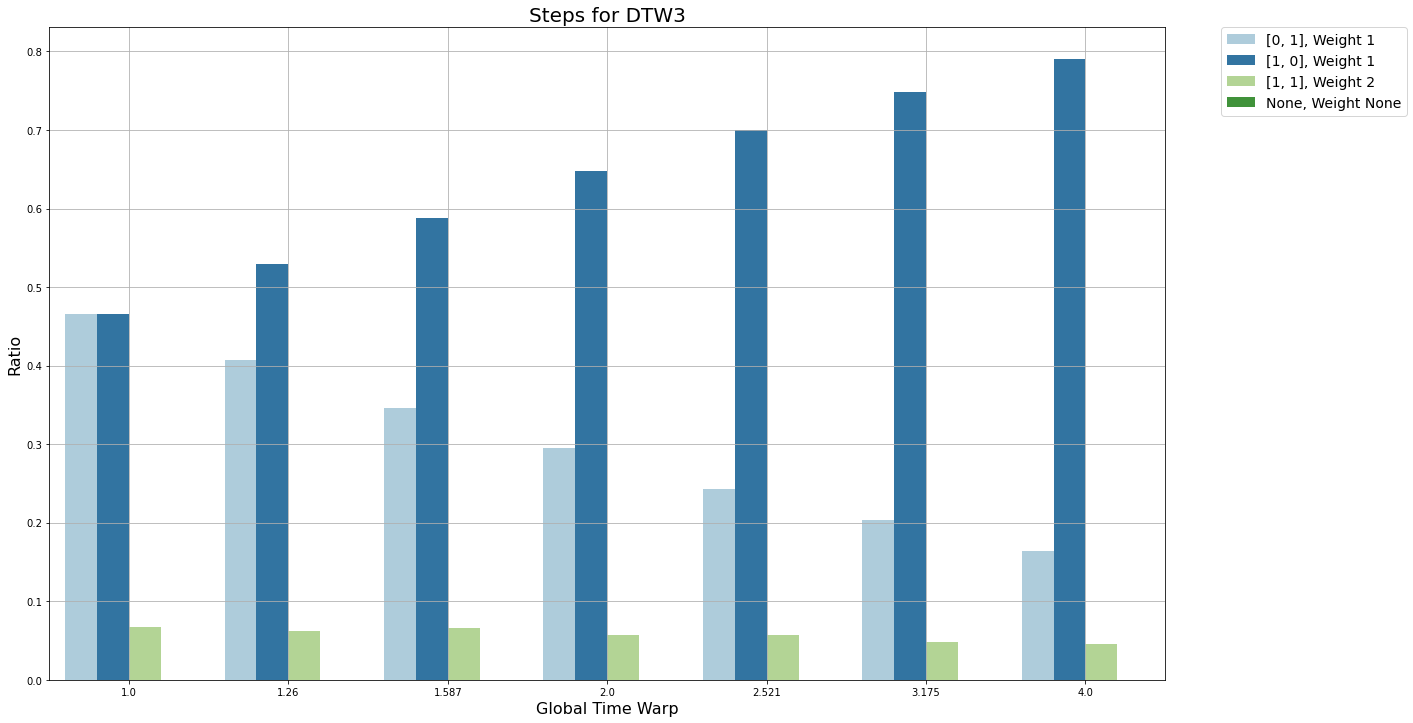

In [83]:
DTW3_steps = [[0, 1], [1, 0], [1, 1], None, None, None]
DTW3_weights = [1,1,2, None, None, None]
graph_steps(ratio_df, 'DTW3', DTW3_steps, DTW3_weights)

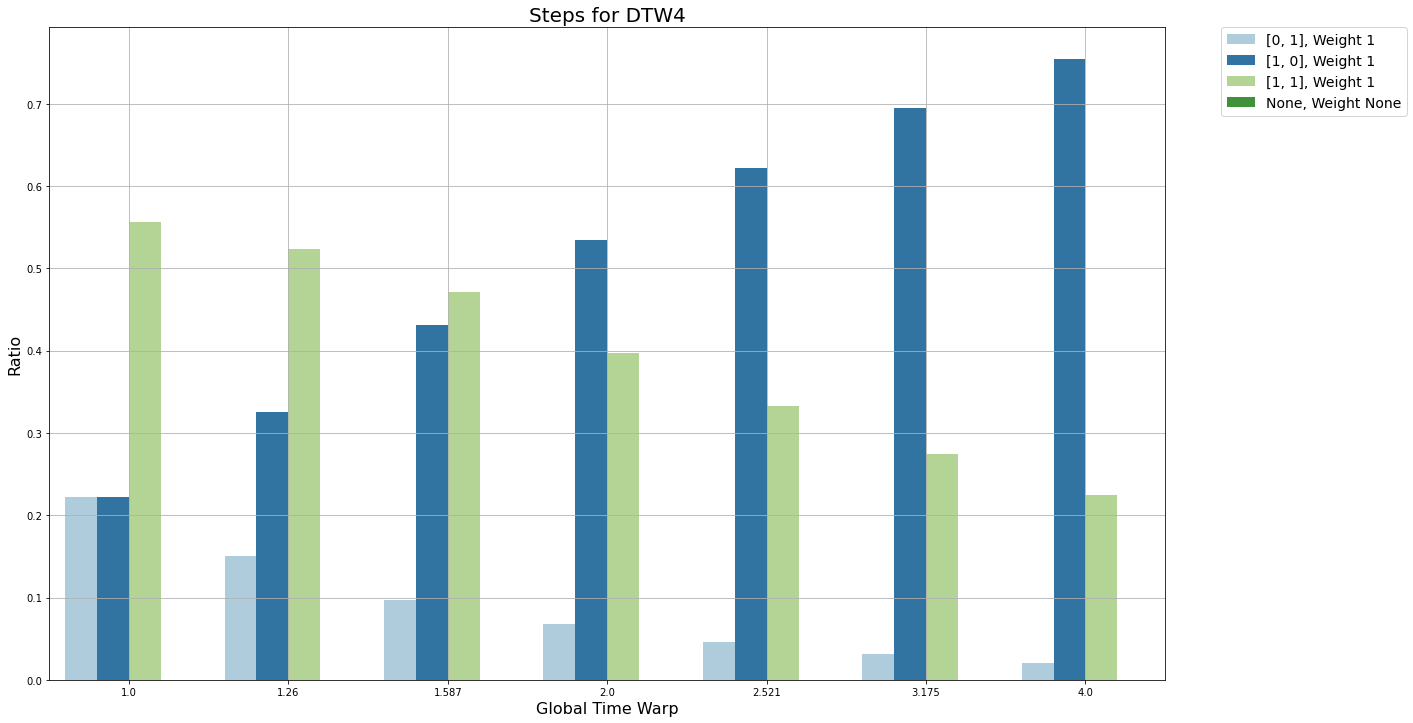

In [84]:
DTW4_steps = [[0, 1], [1, 0], [1, 1], None, None, None]
DTW4_weights = [1,1,1, None, None, None]
graph_steps(ratio_df, 'DTW4', DTW4_steps, DTW4_weights)

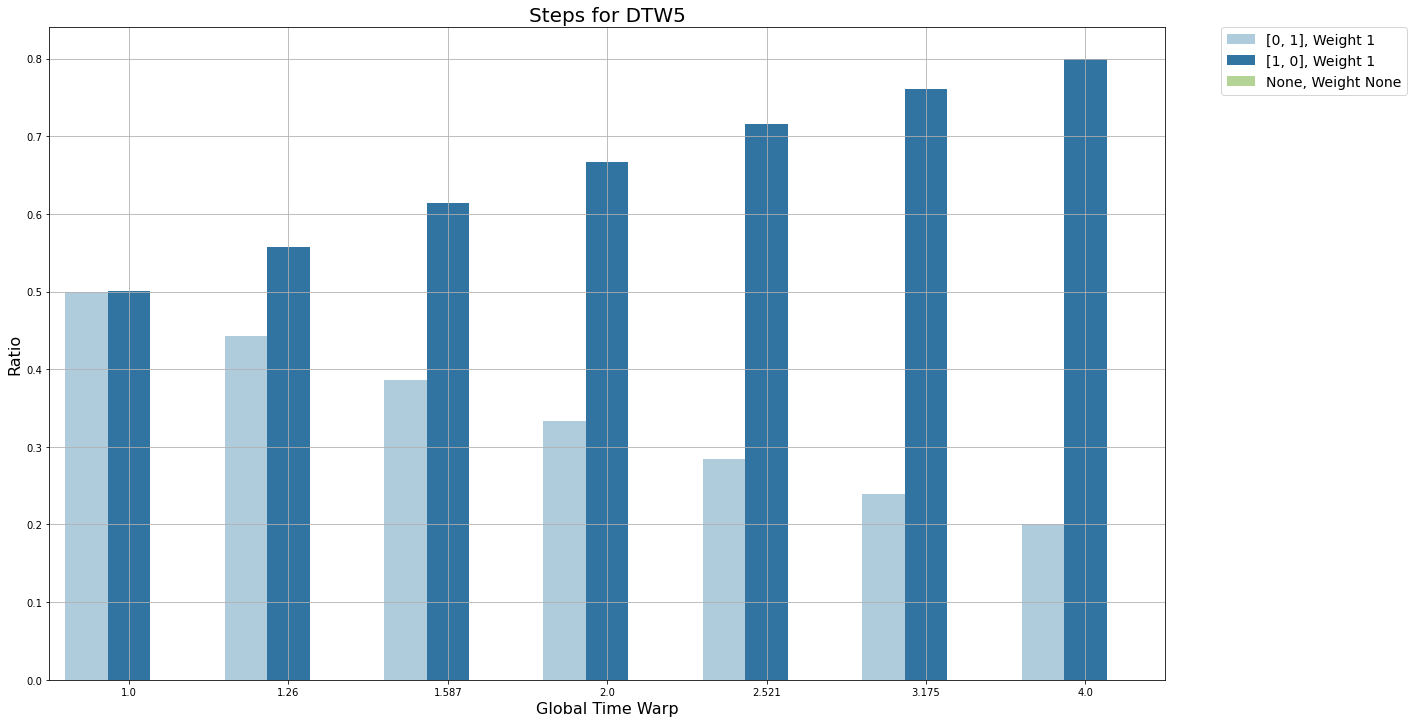

In [85]:
DTW5_steps = [[0, 1], [1, 0], None, None, None, None]
DTW5_weights = [1, 1, None, None, None, None]
graph_steps(ratio_df, 'DTW5', DTW5_steps, DTW5_weights)

### DTW_add3-4

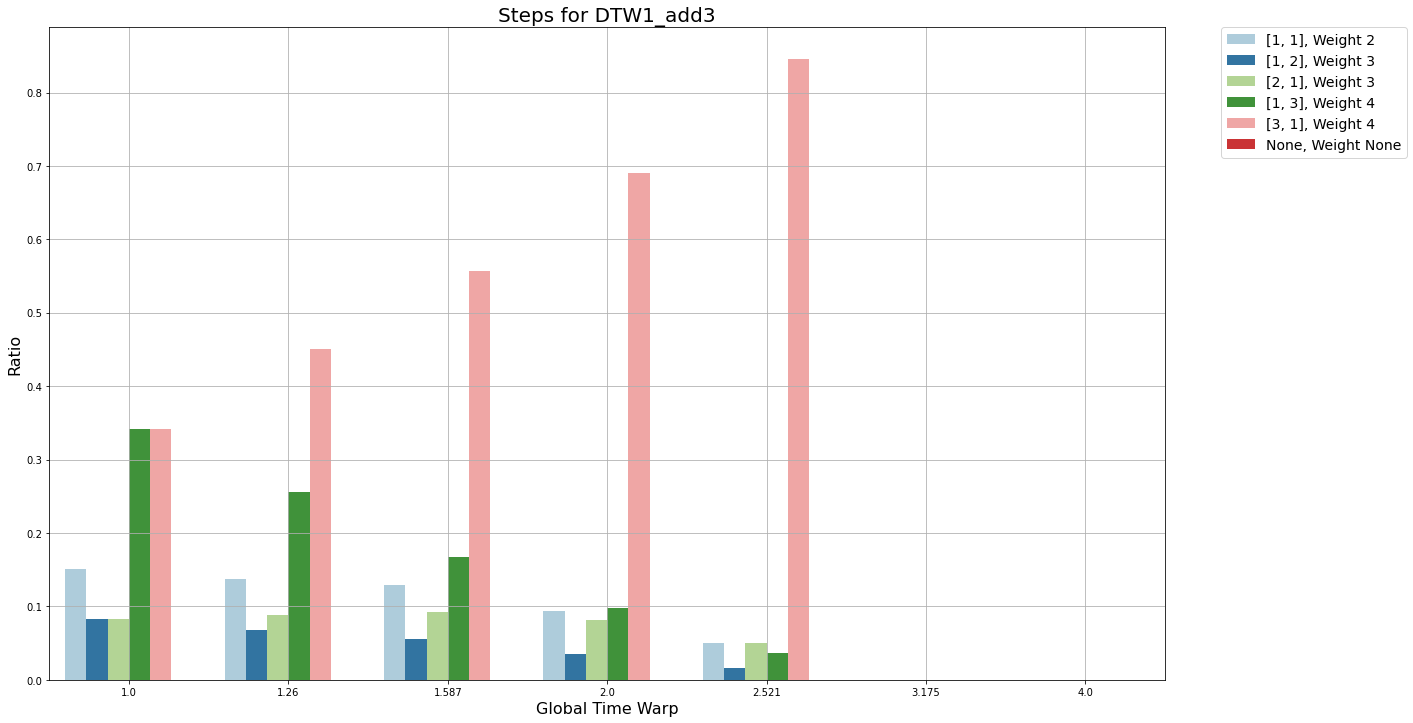

In [89]:
DTW_add3_steps = [[1, 1], [1, 2], [2, 1], [1, 3], [3, 1], None]
DTW_add3_weights = [2, 3, 3, 4, 4, None]
graph_steps(ratio_df, 'DTW1_add3', DTW_add3_steps, DTW_add3_weights)

In [87]:
Need to do AGAIN!!! Because not enough steps were added
# DTW_add4_steps = [[1, 1], [1, 2], [2, 1], [1, 3], [3, 1], None]
# DTW_add4_weights = [2, 3, 3, 4, 4, None]
# graph_steps(ratio_df, 'DTW1_add3', DTW_add3_steps, DTW_add3_weights)ratio_df

,time_warp,align_type,steps,0,1,2,3,4,5,6
0,2.521,DTW1,"[[1, 1], [1, 2], [2, 1]]",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.260,DTW_selectiveTransitions2,"[[0, 1], [1, 0], [1, 1]]",0.157630,0.331423,0.510947,0.0,0.0,0.0,0.0
2,1.587,DTW_adaptiveWeight1,"[[0, 1], [1, 0]]",0.386573,0.613427,0.000000,0.0,0.0,0.0,0.0
3,3.175,DTW1_add3,"[[1, 1], [1, 2], [2, 1], [1, 3], [3, 1]]",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.000,DTW_selectiveTransitions2,"[[0, 1], [1, 0], [1, 1]]",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
113,3.175,DTW1,"[[1, 1], [1, 2], [2, 1]]",NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,1.260,DTW1_downsampleInterpolate,"[[1, 1], [1, 2], [2, 1]]",0.146630,0.426685,0.426685,0.0,0.0,0.0,0.0
115,1.587,DTW_selectiveTransitions3,"[[0, 1], [1, 0], [1, 1]]",0.169673,0.476739,0.353588,0.0,0.0,0.0,0.0
116,3.175,DTW1_upsampleInterpolate,"[[1, 1], [1, 2], [2, 1]]",0.096287,0.451856,0.451856,0.0,0.0,0.0,0.0


### DTW_downsampleX

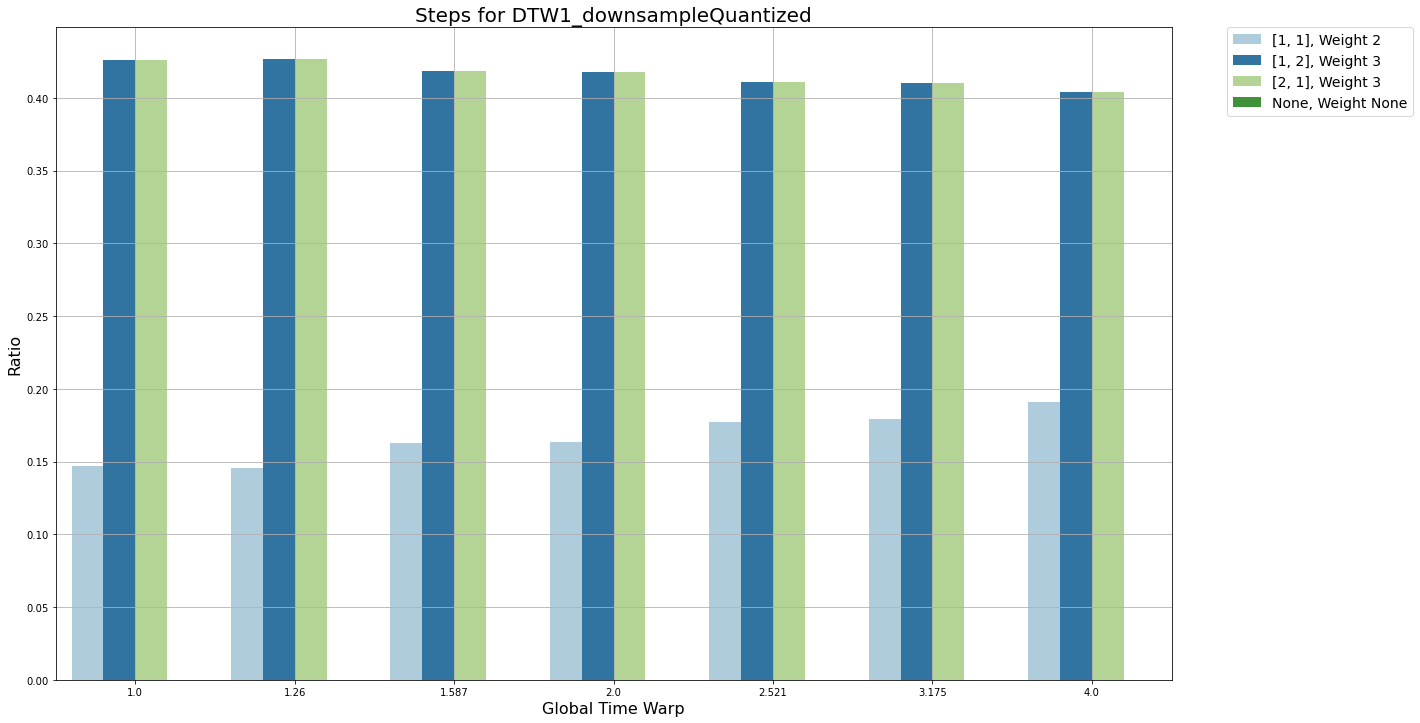

In [90]:
DTW_dsQ_steps = [[1, 1], [1, 2], [2, 1], None, None, None]
DTW_dsQ_weights = [2, 3, 3, None, None, None]
graph_steps(ratio_df, 'DTW1_downsampleQuantized', DTW_dsQ_steps, DTW_dsQ_weights)

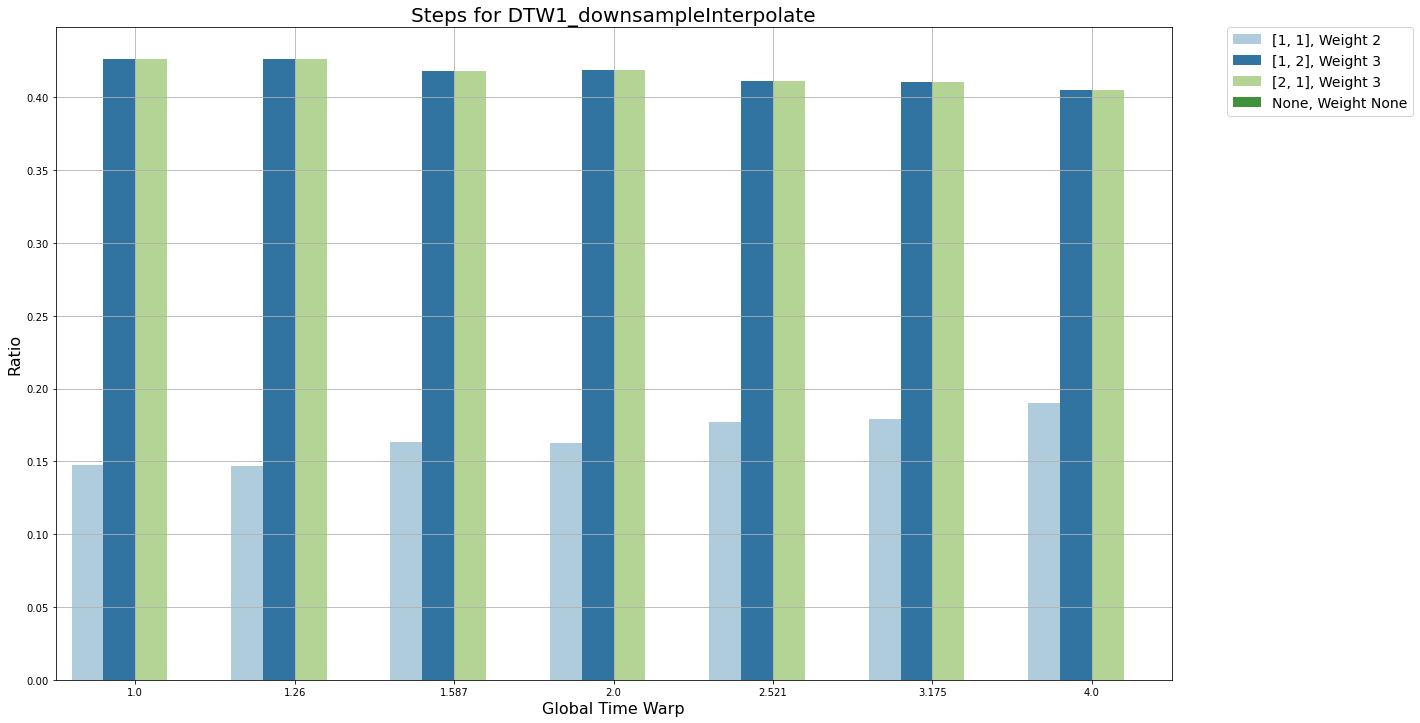

In [91]:
DTW_dsI_steps = [[1, 1], [1, 2], [2, 1], None, None, None]
DTW_dsI_weights = [2, 3, 3, None, None, None]
graph_steps(ratio_df, 'DTW1_downsampleInterpolate', DTW_dsI_steps, DTW_dsI_weights)

### adaptiveWeightX

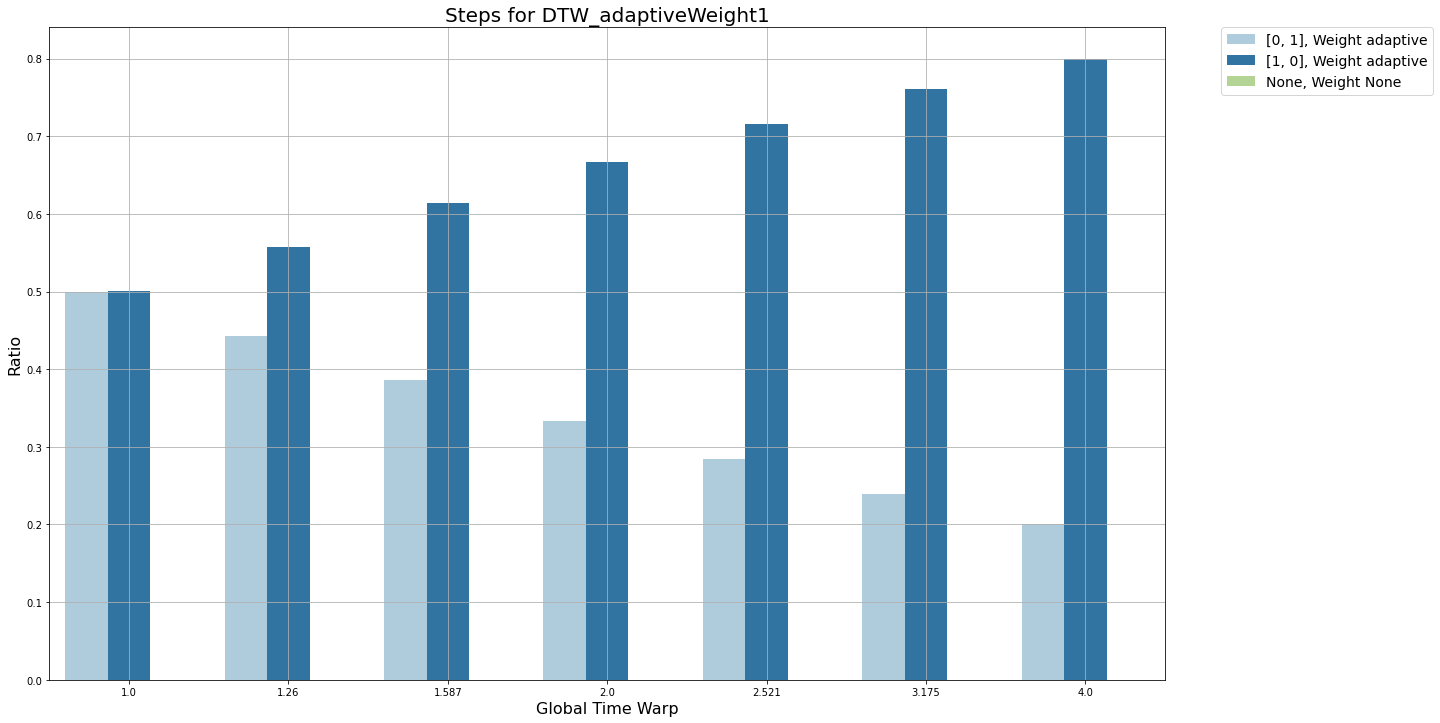

In [94]:
DTW_w1_steps = [[0, 1], [1, 0], None, None, None, None]
DTW_w1_weights = ['adaptive', 'adaptive', None, None, None, None]
graph_steps(ratio_df, 'DTW_adaptiveWeight1', DTW_w1_steps, DTW_w1_weights)

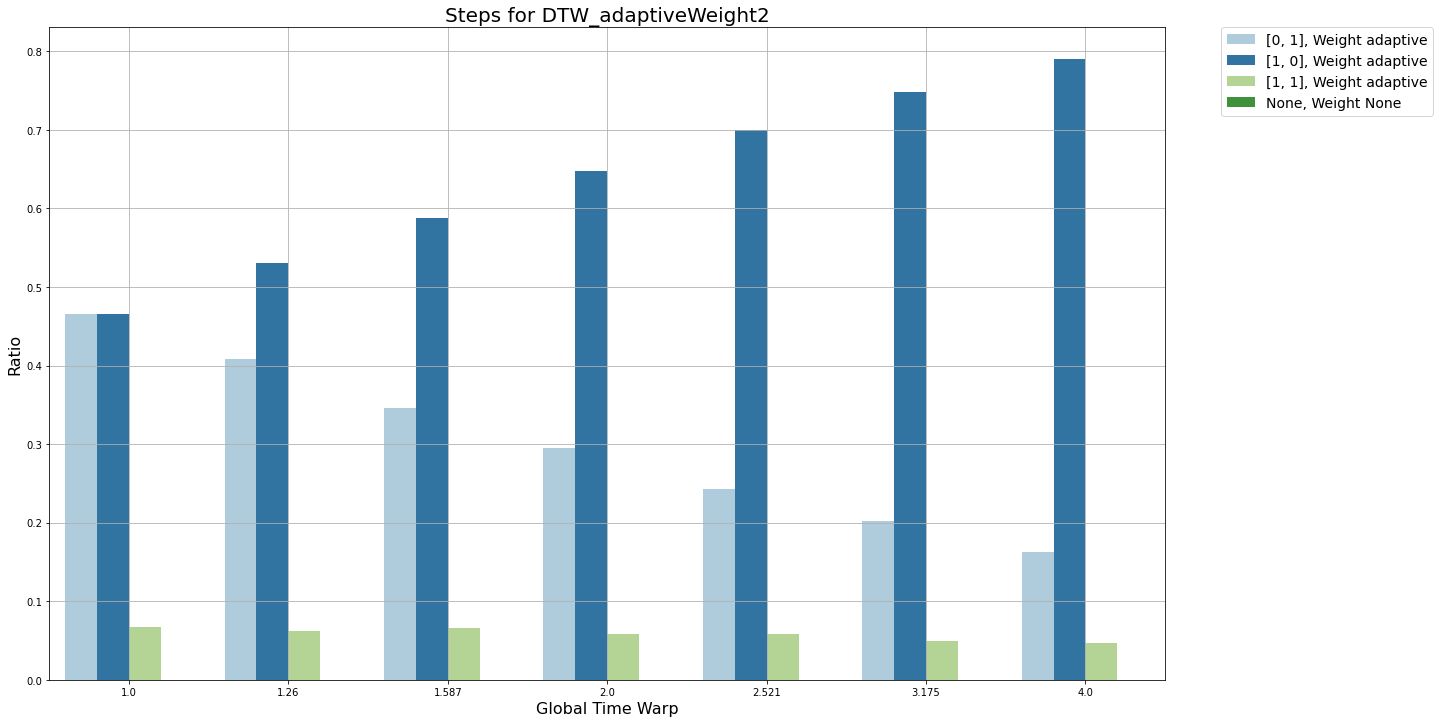

In [95]:
DTW_w2_steps = [[0, 1], [1, 0], [1,1], None, None, None]
DTW_w2_weights = ['adaptive', 'adaptive', 'adaptive', None, None, None]
graph_steps(ratio_df, 'DTW_adaptiveWeight2', DTW_w2_steps, DTW_w2_weights)

### selectiveTransitionsX

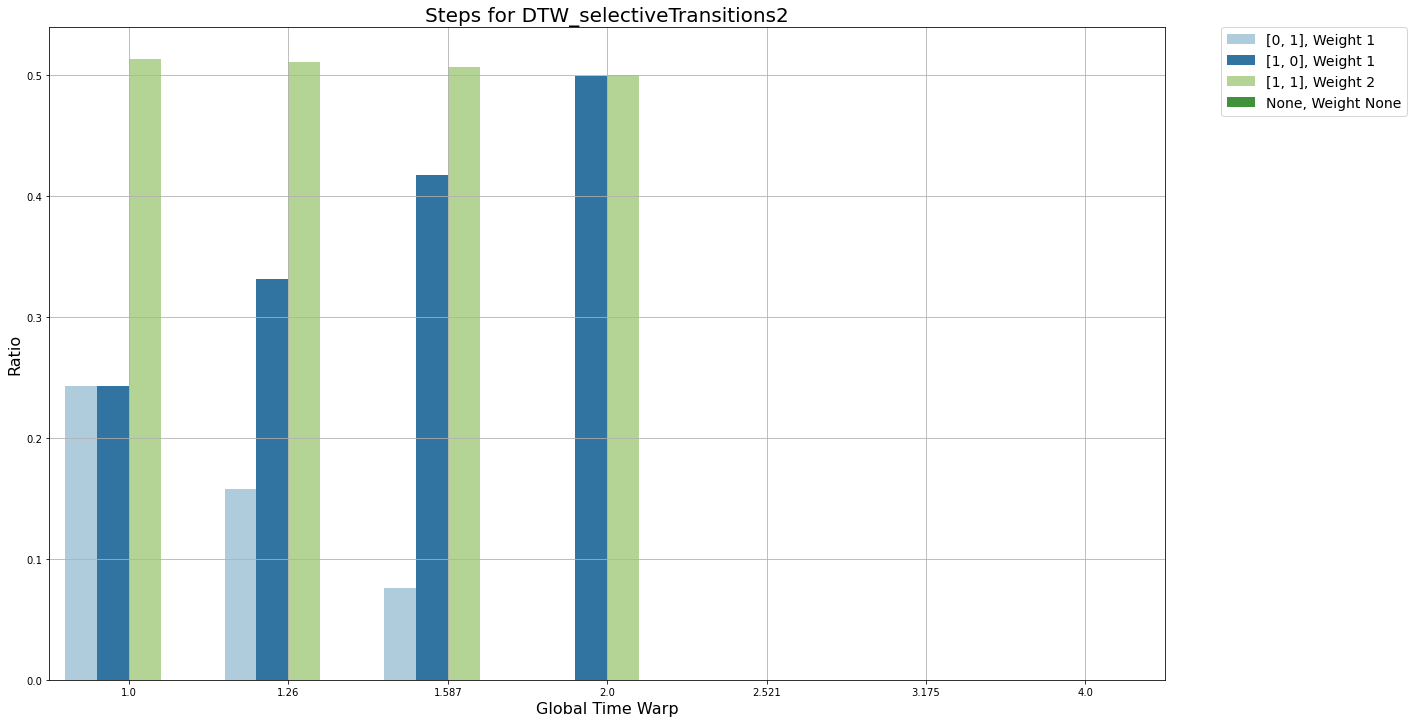

In [102]:
DTW_sT2_steps = [[0, 1], [1, 0], [1,1], None, None, None]
DTW_sT2_weights = [1, 1, 2, None, None, None]
graph_steps(ratio_df, 'DTW_selectiveTransitions2', DTW_sT2_steps, DTW_sT2_weights)

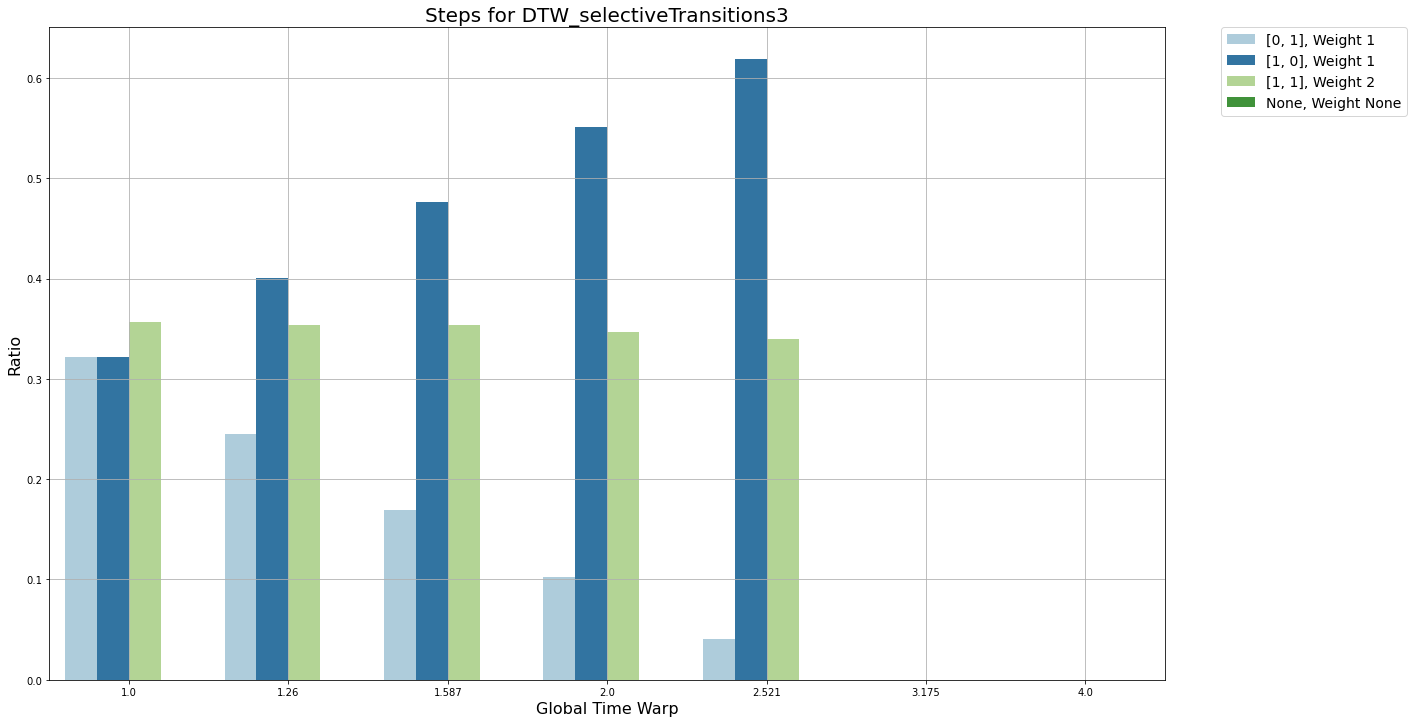

In [103]:
DTW_sT3_steps = [[0, 1], [1, 0], [1,1], None, None, None]
DTW_sT3_weights = [1, 1, 2, None, None, None]
graph_steps(ratio_df, 'DTW_selectiveTransitions3', DTW_sT3_steps, DTW_sT3_weights)

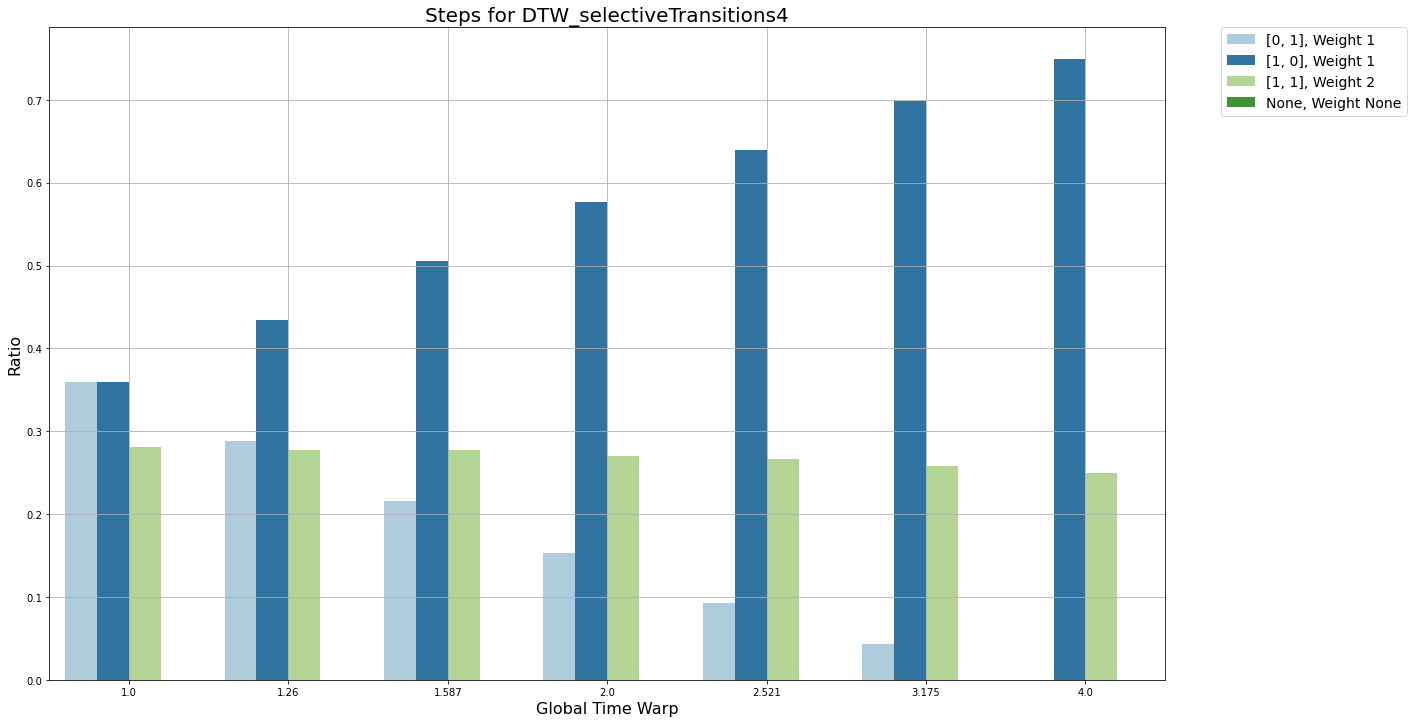

In [104]:
DTW_sT4_steps = [[0, 1], [1, 0], [1,1], None, None, None]
DTW_sT4_weights = [1, 1, 2, None, None, None]
graph_steps(ratio_df, 'DTW_selectiveTransitions4', DTW_sT4_steps, DTW_sT4_weights)

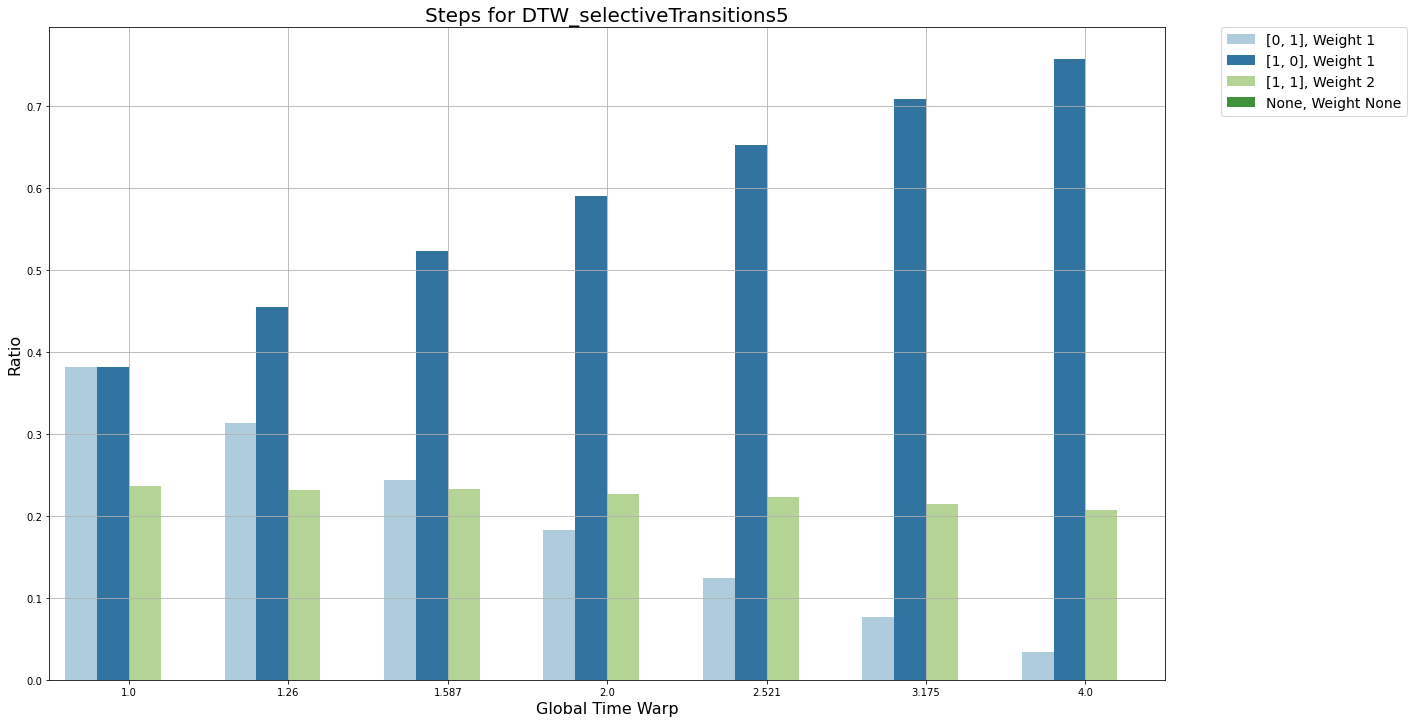

In [105]:
DTW_sT5_steps = [[0, 1], [1, 0], [1,1], None, None, None]
DTW_sT5_weights = [1, 1, 2, None, None, None]
graph_steps(ratio_df, 'DTW_selectiveTransitions5', DTW_sT5_steps, DTW_sT5_weights)

## More Steps Analysis

In [ ]:
# Heatmap with global time warp and steps and weights

In [137]:
DTW_df = ratio_df.loc[(ratio_df['align_type'] != 'DTW1_add4') & (ratio_df['align_type'] != 'DTW1_upsampleInterpolate') & (ratio_df['align_type'] != 'DTW1_upsampleQuantized')]
DTW_final = pd.DataFrame(columns=['time_warp','steps','align_type','step_taken','ratio', 'weight'])

hs = {'DTW1':[DTW1_steps, DTW1_weights], 'DTW2':[DTW2_steps, DTW2_weights], 'DTW3':[DTW3_steps, DTW3_weights], 'DTW4':[DTW4_steps, DTW4_weights], 'DTW5':[DTW5_steps, DTW5_weights], 
      'DTW1_add3':[DTW_add3_steps, DTW_add3_weights], 
      'DTW1_downsampleQuantized':[DTW_dsQ_steps, DTW_dsQ_weights], 'DTW1_downsampleInterpolate':[DTW_dsI_steps, DTW_dsI_weights], 
      'DTW_adaptiveWeight1':[DTW_w1_steps, DTW_w1_weights], 'DTW_adaptiveWeight2':[DTW_w2_steps, DTW_w2_weights], 
      'DTW_selectiveTransitions2':[DTW_sT2_steps, DTW_sT2_weights], 'DTW_selectiveTransitions3':[DTW_sT3_steps, DTW_sT3_weights], 
      'DTW_selectiveTransitions4':[DTW_sT4_steps, DTW_sT4_weights], 'DTW_selectiveTransitions5':[DTW_sT5_steps, DTW_sT5_weights]} # align_type:[[steps], [weights]]

for idx, row in DTW_df.iterrows():
    for i in range(6):
        new_row = {}
        new_row['time_warp'] = row['time_warp']

        step = row['steps']
        new_row['steps'] = step

        align = row['align_type']
        new_row['align_type'] = align

        new_row['step_taken'] = str(hs[align][0][i])
        new_row['weight'] = hs[align][1][i]
        new_row['ratio'] = row[str(i)]

        DTW_final = DTW_final.append(new_row, ignore_index=True)

In [158]:
DTW_final.head()

,time_warp,steps,align_type,step_taken,ratio,weight
0,2.521,"[[1, 1], [1, 2], [2, 1]]",DTW1,"[1, 1]",NaN,2
1,2.521,"[[1, 1], [1, 2], [2, 1]]",DTW1,"[1, 2]",NaN,3
2,2.521,"[[1, 1], [1, 2], [2, 1]]",DTW1,"[2, 1]",NaN,3
3,2.521,"[[1, 1], [1, 2], [2, 1]]",DTW1,None,NaN,None
4,2.521,"[[1, 1], [1, 2], [2, 1]]",DTW1,None,NaN,None


In [156]:
glue = DTW_final.pivot("step_taken", "align_type", "ratio")
sns.heatmap(glue)

ValueError: Index contains duplicate entries, cannot reshape

In [155]:
DTW_final

,time_warp,steps,align_type,step_taken,ratio,weight
0,2.521,"[[1, 1], [1, 2], [2, 1]]",DTW1,"[1, 1]",NaN,2
1,2.521,"[[1, 1], [1, 2], [2, 1]]",DTW1,"[1, 2]",NaN,3
2,2.521,"[[1, 1], [1, 2], [2, 1]]",DTW1,"[2, 1]",NaN,3
3,2.521,"[[1, 1], [1, 2], [2, 1]]",DTW1,None,NaN,None
4,2.521,"[[1, 1], [1, 2], [2, 1]]",DTW1,None,NaN,None
...,...,...,...,...,...,...
583,2.000,"[[0, 1], [1, 0]]",DTW5,"[1, 0]",0.666648,1
584,2.000,"[[0, 1], [1, 0]]",DTW5,None,0.000000,None
585,2.000,"[[0, 1], [1, 0]]",DTW5,None,0.000000,None
586,2.000,"[[0, 1], [1, 0]]",DTW5,None,0.000000,None


In [140]:
flights = sns.load_dataset("flights")

In [141]:
flights

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
...,...,...,...
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390


In [145]:
flights = flights.pivot("month", "year", "passengers")

In [146]:
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


In [153]:
DTW_hm = DTW_final[['align_type','weight','ratio']]
DTW_hm.reset_index()

,index,align_type,weight,ratio
0,0,DTW1,2,NaN
1,1,DTW1,3,NaN
2,2,DTW1,3,NaN
3,3,DTW1,None,NaN
4,4,DTW1,None,NaN
...,...,...,...,...
583,583,DTW5,1,0.666648
584,584,DTW5,None,0.000000
585,585,DTW5,None,0.000000
586,586,DTW5,None,0.000000


In [136]:
DTW_final

,time_warp,steps,align_type,step_taken,ratio,weight
0,2.521,"[[1, 1], [1, 2], [2, 1]]",DTW1,"[1, 1]",NaN,2
1,2.521,"[[1, 1], [1, 2], [2, 1]]",DTW1,"[1, 2]",NaN,3
2,2.521,"[[1, 1], [1, 2], [2, 1]]",DTW1,"[2, 1]",NaN,3
3,2.521,"[[1, 1], [1, 2], [2, 1]]",DTW1,None,NaN,None
4,2.521,"[[1, 1], [1, 2], [2, 1]]",DTW1,None,NaN,None
...,...,...,...,...,...,...
583,2.000,"[[0, 1], [1, 0]]",DTW5,"[1, 0]",0.666648,1
584,2.000,"[[0, 1], [1, 0]]",DTW5,None,0.000000,None
585,2.000,"[[0, 1], [1, 0]]",DTW5,None,0.000000,None
586,2.000,"[[0, 1], [1, 0]]",DTW5,None,0.000000,None
